In [58]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [59]:
df = pd.read_csv("C:/Users/mihir/Desktop/us_car_data.csv")
df.head()

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,CAFV,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,latitude
0,Thurston,Tumwater,WA,98512,2019,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,220,0,22,242565116,PUGET SOUND ENERGY INC,53067010910,-122.913102,47.013593
1,Island,Clinton,WA,98236,2022,NISSAN,LEAF,Battery Electric Vehicle,Eligibility unknown as battery range has not b...,0,0,10,183272785,PUGET SOUND ENERGY INC,53029972000,-122.359364,47.979655
2,Snohomish,Snohomish,WA,98290,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,266,0,44,112552366,PUGET SOUND ENERGY INC,53061052502,-122.091505,47.915555
3,King,Seattle,WA,98134,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,322,0,11,6336319,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033009300,-122.329815,47.579810
4,Snohomish,Edmonds,WA,98020,2013,TESLA,MODEL S,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,208,69900,21,186212960,PUGET SOUND ENERGY INC,53061050403,-122.375070,47.808070


In [60]:
df['CAFV'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Eligibility unknown as battery range has not been researched',
       'Not eligible due to low battery range'], dtype=object)

In [61]:
# Assuming you have a DataFrame called 'df' and a column 'CAFV'
# Create a new column 'Eligibility' to store the extracted eligibility status
df['CAFV_Eligibility'] = ''

# Check if the 'CAFV' column contains the word 'Eligible'
df.loc[df['CAFV'].str.contains('Eligible', case=False), 'CAFV_Eligibility'] = 'Eligible'

# Check if the 'CAFV' column contains the word 'Not eligible'
df.loc[df['CAFV'].str.contains('Not eligible', case=False), 'CAFV_Eligibility'] = 'Not Eligible'

# Check if the 'CAFV' column contains the word 'Eligibility unknown'
df.loc[df['CAFV'].str.contains('Eligibility unknown', case=False), 'CAFV_Eligibility'] = 'Eligibility Unknown'


In [62]:
df.head(25)

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,CAFV,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,latitude,CAFV_Eligibility
0,Thurston,Tumwater,WA,98512,2019,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,220,0,22,242565116,PUGET SOUND ENERGY INC,53067010910,-122.913102,47.013593,Eligible
1,Island,Clinton,WA,98236,2022,NISSAN,LEAF,Battery Electric Vehicle,Eligibility unknown as battery range has not b...,0,0,10,183272785,PUGET SOUND ENERGY INC,53029972000,-122.359364,47.979655,Eligibility Unknown
2,Snohomish,Snohomish,WA,98290,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,266,0,44,112552366,PUGET SOUND ENERGY INC,53061052502,-122.091505,47.915555,Eligible
3,King,Seattle,WA,98134,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,322,0,11,6336319,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033009300,-122.329815,47.579810,Eligible
4,Snohomish,Edmonds,WA,98020,2013,TESLA,MODEL S,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,208,69900,21,186212960,PUGET SOUND ENERGY INC,53061050403,-122.375070,47.808070,Eligible
5,Chelan,Manson,WA,98831,2018,BMW,I3,Plug-in Hybrid Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,97,0,12,215122904,PUD NO 1 OF CHELAN COUNTY,53007960400,-120.153100,47.885505,Eligible
6,Snohomish,Marysville,WA,98271,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,308,0,38,110992472,PUGET SOUND ENERGY INC,53061053102,-122.171385,48.104330,Eligible
7,Snohomish,Edmonds,WA,98026,2021,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle,Not eligible due to low battery range,18,0,21,138909032,PUGET SOUND ENERGY INC,53061050300,-122.335685,47.803720,Not Eligible
8,Thurston,Olympia,WA,98501,2019,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle,Not eligible due to low battery range,25,0,22,272310279,PUGET SOUND ENERGY INC,53067010700,-122.896920,47.043535,Not Eligible
9,Thurston,Lacey,WA,98503,2018,NISSAN,LEAF,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,151,0,22,235573929,PUGET SOUND ENERGY INC,53067011422,-122.828500,47.036460,Eligible


In [63]:
df['CAFV_Eligibility'].value_counts()

CAFV_Eligibility
Eligible               61082
Eligibility Unknown    56618
Not Eligible           16774
Name: count, dtype: int64

In [64]:
eligibility = 100*(df['CAFV_Eligibility'].value_counts()/len(df))

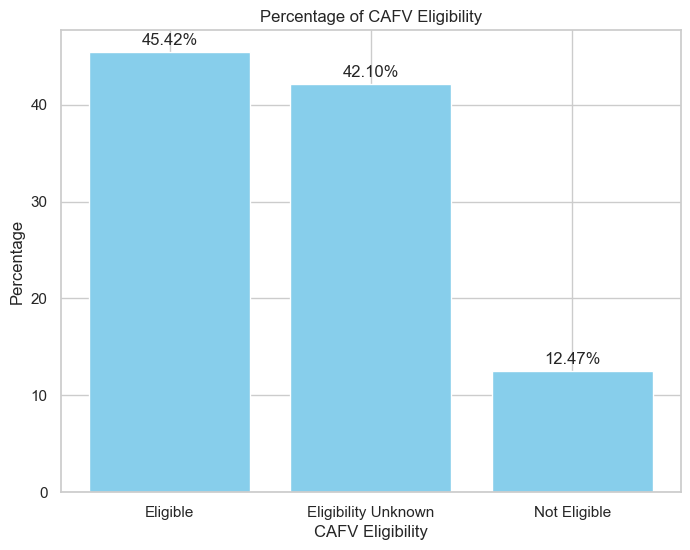

In [65]:
import matplotlib.pyplot as plt

# Your data
categories = eligibility.index
values = eligibility

plt.figure(figsize=(8, 6))  # Set the figure size

# Create a bar plot
bars = plt.bar(categories, values, color='skyblue')

# Set the title and axis labels
plt.title('Percentage of CAFV Eligibility')
plt.xlabel('CAFV Eligibility')
plt.ylabel('Percentage')

# Rotate x-axis labels if needed
plt.xticks(rotation=0)

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

# Show the plot
plt.show()


In [66]:
# First, filter the rows where 'CAFV_Eligibility' is 'Not Eligible'
not_eligible_df = df[df['CAFV_Eligibility'] == 'Not Eligible']

NE_data = not_eligible_df['Electric Range']

In [67]:
NE_data

7         18
8         25
12        26
20        18
21        19
          ..
134458    24
134460    19
134463    22
134466    21
134473    19
Name: Electric Range, Length: 16774, dtype: int64

In [68]:
NE_data.describe()

count    16774.000000
mean        19.624300
std          5.204529
min          6.000000
25%         17.000000
50%         20.000000
75%         25.000000
max         29.000000
Name: Electric Range, dtype: float64

<Axes: xlabel='Electric Range', ylabel='Count'>

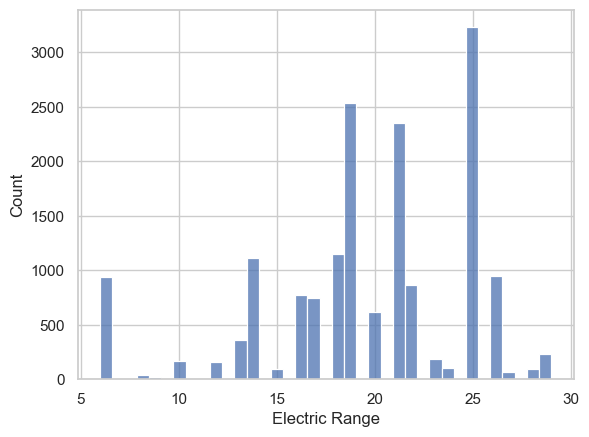

In [69]:
sns.set(style="whitegrid")
sns.histplot(NE_data)

In [70]:
ne_company  = df[df['CAFV_Eligibility'] == 'Not Eligible']
ne_model_year =ne_company['Model Year'].value_counts()
ne_name = ne_company['Make'].value_counts()

In [71]:
ne_name

Make
TOYOTA           3399
FORD             3365
JEEP             2608
BMW              1729
VOLVO            1524
AUDI             1299
KIA               829
MITSUBISHI        532
PORSCHE           465
MERCEDES-BENZ     271
HYUNDAI           217
LINCOLN           211
MINI              200
SUBARU             63
LAND ROVER         38
MAZDA              12
HONDA               9
BENTLEY             3
Name: count, dtype: int64

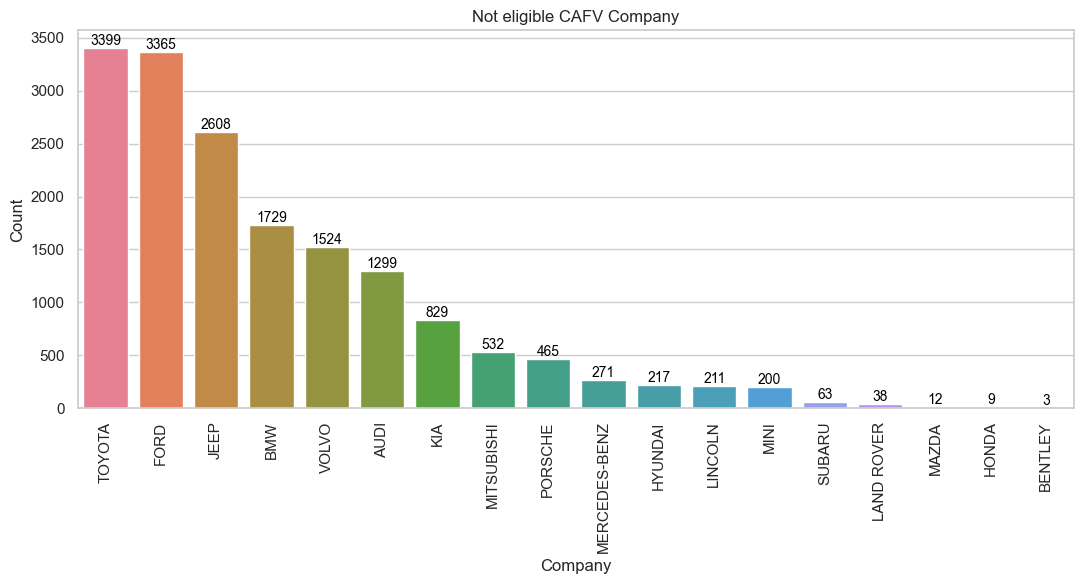

In [72]:
plt.figure(figsize=(11, 6))

# Create a Seaborn bar plot with a vibrant color palette (e.g., 'Set1')
not_eligible = sns.barplot(x=ne_name.index, y=ne_name, hue=ne_name.index, legend=False)

plt.title('Not eligible CAFV Company')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
ax = plt.gca()
for p in not_eligible.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height():.0f}', ha='center', va='bottom', fontsize=10, color='black')


plt.show()


In [73]:
ne_year=ne_model_year.sort_values(ascending=False)

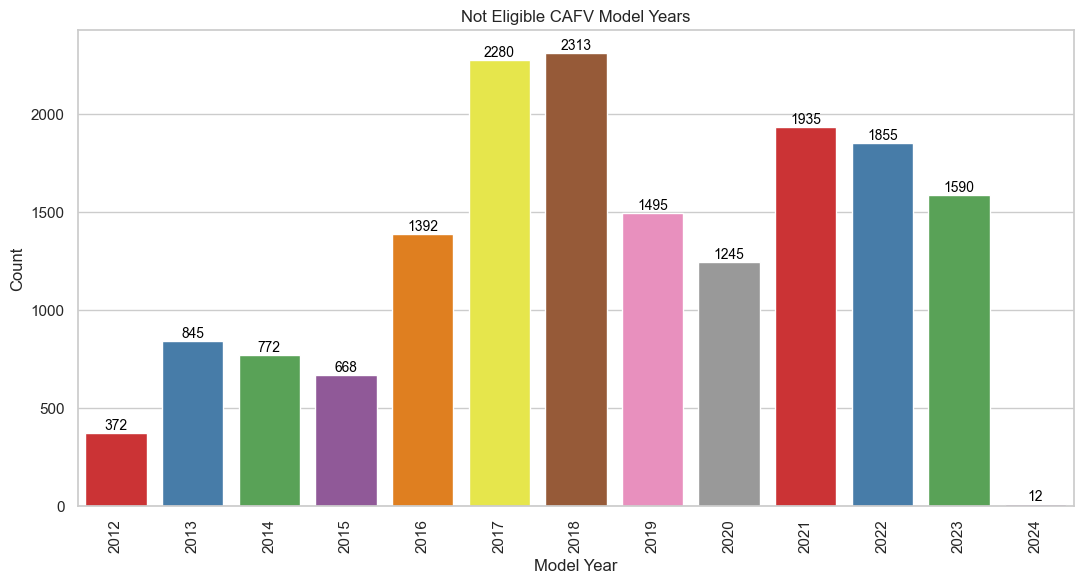

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (assuming 'ne_year' is a Pandas Series)
ne_year = ne_company['Model Year'].value_counts()

plt.figure(figsize=(11, 6))

# Create a Seaborn bar plot with 'hue' and 'legend'
year = sns.barplot(x=ne_year.index, y=ne_year.values, palette='Set1', hue=ne_year.index, legend=False)

plt.title('Not Eligible CAFV Model Years')
plt.xlabel('Model Year')
plt.ylabel('Count')

plt.xticks(rotation=90)
plt.tight_layout()

ax = plt.gca()
for p in year.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height():.0f}', ha='center', va='bottom', fontsize=10, color='black')

plt.show()


# Toyota,Ford, Jeep accounts for the 55.87% of 'not eligible' cars for CAFV. Most of the cars are Hybrid which were launched between 2016-2023. 

In [75]:
df.head()

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,CAFV,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,latitude,CAFV_Eligibility
0,Thurston,Tumwater,WA,98512,2019,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,220,0,22,242565116,PUGET SOUND ENERGY INC,53067010910,-122.913102,47.013593,Eligible
1,Island,Clinton,WA,98236,2022,NISSAN,LEAF,Battery Electric Vehicle,Eligibility unknown as battery range has not b...,0,0,10,183272785,PUGET SOUND ENERGY INC,53029972000,-122.359364,47.979655,Eligibility Unknown
2,Snohomish,Snohomish,WA,98290,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,266,0,44,112552366,PUGET SOUND ENERGY INC,53061052502,-122.091505,47.915555,Eligible
3,King,Seattle,WA,98134,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,322,0,11,6336319,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033009300,-122.329815,47.579810,Eligible
4,Snohomish,Edmonds,WA,98020,2013,TESLA,MODEL S,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,208,69900,21,186212960,PUGET SOUND ENERGY INC,53061050403,-122.375070,47.808070,Eligible


In [76]:
df['Base MSRP'].value_counts()

Base MSRP
0         131055
69900       1430
31950        400
52900        214
32250        152
54950        136
59900        127
39995        121
36900        100
44100         96
64950         86
45600         75
33950         74
52650         63
34995         63
55700         51
36800         49
53400         36
110950        20
98950         19
81100         18
75095         16
90700         16
102000        15
43700         11
184400        11
109000         7
89100          6
32995          3
91250          3
845000         1
Name: count, dtype: int64

In [77]:
df.drop(['Base MSRP'],axis=1,inplace=True)

In [78]:
df.head()

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,CAFV,Electric Range,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,latitude,CAFV_Eligibility
0,Thurston,Tumwater,WA,98512,2019,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,220,22,242565116,PUGET SOUND ENERGY INC,53067010910,-122.913102,47.013593,Eligible
1,Island,Clinton,WA,98236,2022,NISSAN,LEAF,Battery Electric Vehicle,Eligibility unknown as battery range has not b...,0,10,183272785,PUGET SOUND ENERGY INC,53029972000,-122.359364,47.979655,Eligibility Unknown
2,Snohomish,Snohomish,WA,98290,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,266,44,112552366,PUGET SOUND ENERGY INC,53061052502,-122.091505,47.915555,Eligible
3,King,Seattle,WA,98134,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,322,11,6336319,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033009300,-122.329815,47.579810,Eligible
4,Snohomish,Edmonds,WA,98020,2013,TESLA,MODEL S,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,208,21,186212960,PUGET SOUND ENERGY INC,53061050403,-122.375070,47.808070,Eligible


In [81]:
e_un = df[df['CAFV_Eligibility'] == 'Eligibility Unknown']
e_un['Model Year'].value_counts()

Model Year
2022    23754
2023    18360
2021    14429
2020       57
2024       15
2019        3
Name: count, dtype: int64

In [82]:
e_unknown =  e_un['Make'].value_counts().head(10)

In [83]:
e_unknown

Make
TESLA         35847
FORD           2965
CHEVROLET      2736
VOLKSWAGEN     2473
KIA            2269
NISSAN         2096
RIVIAN         1805
HYUNDAI        1750
BMW             890
AUDI            805
Name: count, dtype: int64

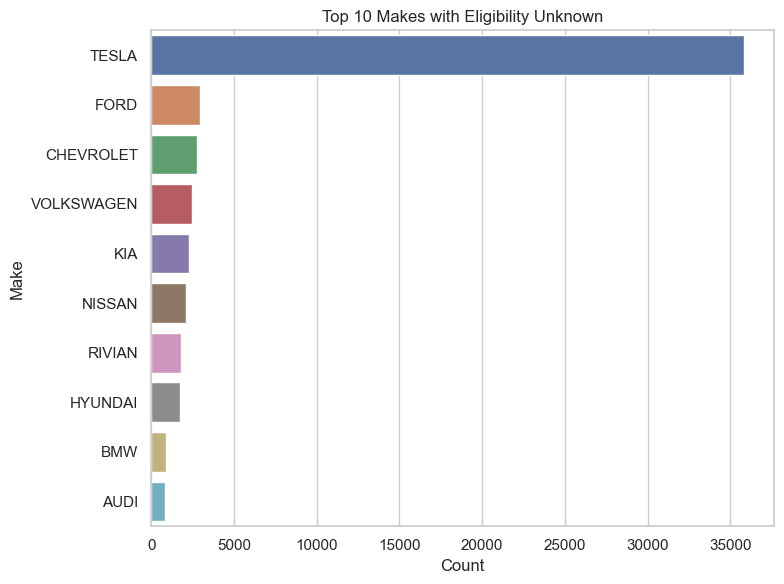

In [88]:
plt.figure(figsize=(8,6))
e_unknown = e_un['Make'].value_counts().head(10)
sns.barplot(y=e_unknown.index,x=e_unknown.values,hue=e_unknown.index)
plt.title('Top 10 Makes with Eligibility Unknown')
plt.xlabel('Count')
plt.ylabel('Make')
plt.tight_layout()

plt.show()

In [24]:
e_un_tesla = e_un[e_un['Make']=='TESLA']

e_un=  e_un_tesla['Model'].value_counts()


In [27]:
e_un

Model
MODEL Y    21164
MODEL 3    11741
MODEL X     1599
MODEL S     1343
Name: count, dtype: int64

C:\Users\mihir\AppData\Local\Temp\ipykernel_7260\3901348721.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=e_un.values, y=e_un.index, palette='Set1')


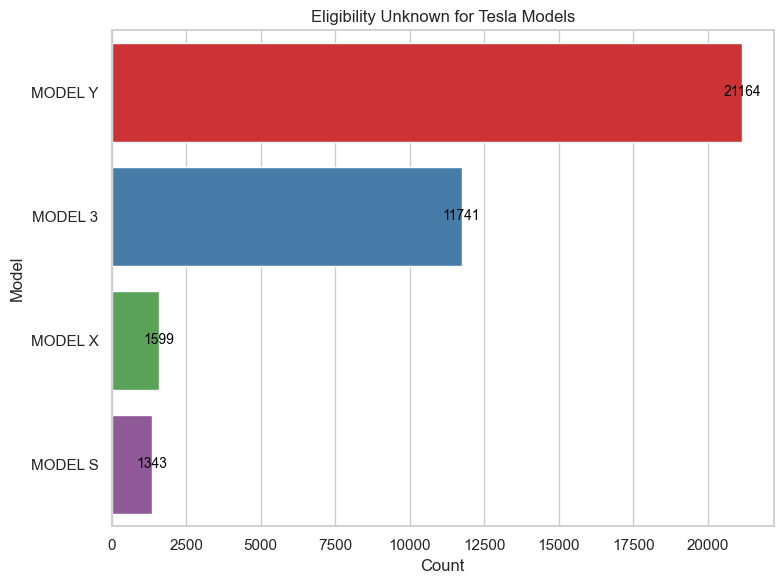

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (assuming 'e_un' is a Pandas Series)
e_un_tesla = e_un[e_un['Make'] == 'TESLA']
e_un = e_un_tesla['Model'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=e_un.values, y=e_un.index, palette='Set1')

plt.title('Eligibility Unknown for Tesla Models')
plt.xlabel('Count')
plt.ylabel('Model')

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height() / 2., f'{int(p.get_width())}', ha='center', va='center', fontsize=10, color='black')

plt.tight_layout()

plt.show()


In the category of "Eligibility Unknown" electric vehicles, Tesla plays a prominent role with 35,847 vehicles. Notably, the Tesla Model Y, a popular electric crossover, stands out for its remarkable 315-mile electric range. The data reveals a distribution across various model years, with 2022 leading at 23,754 vehicles, followed by 2023 (18,360 vehicles), and 2021 (14,429 vehicles). These insights highlight the prevalence of electric vehicles with "Eligibility Unknown" status and emphasize Tesla's significance in the EV market.

Note: Some Tesla Model Y vehicles have "Eligibility Unknown" status due to human data collection error. This has been addressed for data transparency.

#

In [90]:
df.head()

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,CAFV,Electric Range,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,latitude,CAFV_Eligibility
0,Thurston,Tumwater,WA,98512,2019,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,220,22,242565116,PUGET SOUND ENERGY INC,53067010910,-122.913102,47.013593,Eligible
1,Island,Clinton,WA,98236,2022,NISSAN,LEAF,Battery Electric Vehicle,Eligibility unknown as battery range has not b...,0,10,183272785,PUGET SOUND ENERGY INC,53029972000,-122.359364,47.979655,Eligibility Unknown
2,Snohomish,Snohomish,WA,98290,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,266,44,112552366,PUGET SOUND ENERGY INC,53061052502,-122.091505,47.915555,Eligible
3,King,Seattle,WA,98134,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,322,11,6336319,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033009300,-122.329815,47.579810,Eligible
4,Snohomish,Edmonds,WA,98020,2013,TESLA,MODEL S,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,208,21,186212960,PUGET SOUND ENERGY INC,53061050403,-122.375070,47.808070,Eligible


In [91]:
city = df['City'].value_counts()

In [92]:
city.head(10)

City
Seattle      23408
Bellevue      6944
Redmond       4958
Vancouver     4815
Kirkland      4196
Bothell       4191
Sammamish     3945
Renton        3511
Olympia       3224
Tacoma        2842
Name: count, dtype: int64

- check which company is more famous in top 10 cities
- which  city has more count of CAFV
- which model is famous in which top 5 cities
- which electricy utility has more number of of charging stations
- plot map of charging stations.

In [93]:
df['Make'].value_counts()

Make
TESLA                   61650
NISSAN                  13138
CHEVROLET               11417
FORD                     6876
BMW                      5881
KIA                      5484
TOYOTA                   4857
VOLKSWAGEN               3518
VOLVO                    2965
AUDI                     2720
JEEP                     2608
HYUNDAI                  2390
CHRYSLER                 2222
RIVIAN                   1805
PORSCHE                   951
FIAT                      807
HONDA                     786
MERCEDES-BENZ             777
MITSUBISHI                747
MINI                      742
POLESTAR                  657
SMART                     277
SUBARU                    272
JAGUAR                    222
LINCOLN                   211
LUCID                     141
CADILLAC                  119
LEXUS                      80
GENESIS                    67
LAND ROVER                 42
FISKER                     15
MAZDA                      12
AZURE DYNAMICS              8
TH!NK

In [94]:
df1 = df.copy()

In [95]:
df1.head()

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,CAFV,Electric Range,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,latitude,CAFV_Eligibility
0,Thurston,Tumwater,WA,98512,2019,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,220,22,242565116,PUGET SOUND ENERGY INC,53067010910,-122.913102,47.013593,Eligible
1,Island,Clinton,WA,98236,2022,NISSAN,LEAF,Battery Electric Vehicle,Eligibility unknown as battery range has not b...,0,10,183272785,PUGET SOUND ENERGY INC,53029972000,-122.359364,47.979655,Eligibility Unknown
2,Snohomish,Snohomish,WA,98290,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,266,44,112552366,PUGET SOUND ENERGY INC,53061052502,-122.091505,47.915555,Eligible
3,King,Seattle,WA,98134,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,322,11,6336319,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033009300,-122.329815,47.579810,Eligible
4,Snohomish,Edmonds,WA,98020,2013,TESLA,MODEL S,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,208,21,186212960,PUGET SOUND ENERGY INC,53061050403,-122.375070,47.808070,Eligible


In [99]:
# Convert the 'CAFV' column to a numeric data type (assuming it's an integer)
df['CAFV'] = pd.to_numeric(df['CAFV'], errors='coerce')  # 'coerce' will convert non-numeric values to NaN

# Find the top 10 cities by CAFV counts
top_cities = df.groupby('City')['CAFV'].sum().nlargest(10).index

# For each city, find the most famous company
for city in top_cities:
    most_famous_company = df[df['City'] == city].nlargest(1, 'CAFV')['Make'].values[0]
    print(f"The most famous company in {city} is {most_famous_company}")


The most famous company in Aberdeen is CHEVROLET
The most famous company in Acme is FORD
The most famous company in Addy is TOYOTA
The most famous company in Airway Heights is TESLA
The most famous company in Alderdale is RIVIAN
The most famous company in Algona is TESLA
The most famous company in Allyn is TESLA
The most famous company in Amanda Park is TESLA
The most famous company in Amboy is AUDI
The most famous company in Anacortes is BMW
